In [1]:
#Librerias

import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
#Lectura y limpieza de la base de datos 

df = pd.read_csv('depositos_oinks.csv')
df.head()

,Unnamed: 0,user_id,operation_value,operation_date,maplocation_name,user_createddate
0,0,0e52d550-ae23-407a-9b1f-6e5fb1f066ab,273850.0,2022-01-14 13:07:56,CC Plaza de las Américas - Plaza Mariposa,2022-01-09 19:23:18.332689
1,1,975ed41e-d891-4c23-aeba-06363019d8e3,900.0,2022-02-06 13:11:25,CC Plaza de las Américas - Plaza Mariposa,2022-01-10 15:19:29.419075
2,2,f9043545-dfc2-402f-a8c7-0a61f21cb719,1800.0,2022-02-23 14:01:56,Universidad de los Andes - ML Piso 5,2021-08-25 12:44:48.524941
3,3,979ca8ad-9600-4a1f-81e9-e70c2f55cdc5,6500.0,2021-12-16 12:09:45,CC Plaza de las Américas - Plaza Mariposa,2021-07-17 17:11:16.766291
4,4,171db06e-2e4b-4542-a9c9-32028520fda4,150000.0,2022-01-25 12:00:18,CC Plaza de las Américas - Plaza Mariposa,2022-01-11 15:59:27.651994


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['operation_date'] = pd.to_datetime(df['operation_date']).dt.date
df['user_createddate'] = pd.to_datetime(df['user_createddate']).dt.date

In [4]:
#Análsis preliminares

len(df)

4345

In [5]:
len(np.unique(df['user_id']))

1656

In [6]:
df.groupby("user_id", group_keys=True).apply(lambda x: x)

user_id  \
user_id                                                                           
001762e3-094d-415c-9304-c7c182e0c16a 1206  001762e3-094d-415c-9304-c7c182e0c16a   
                                     1710  001762e3-094d-415c-9304-c7c182e0c16a   
                                     2469  001762e3-094d-415c-9304-c7c182e0c16a   
002a5f4d-a93d-4cc5-b089-e16169bc16a2 4064  002a5f4d-a93d-4cc5-b089-e16169bc16a2   
006687d3-8ff3-461e-bdac-cb8e8e4c5a26 1015  006687d3-8ff3-461e-bdac-cb8e8e4c5a26   
...                                                                         ...   
ff5aacc8-320e-4cc3-82a8-059316b857c4 997   ff5aacc8-320e-4cc3-82a8-059316b857c4   
ffaace49-8a5c-4030-a791-8815b5314283 1501  ffaace49-8a5c-4030-a791-8815b5314283   
ffe7b3ac-7c57-487d-91bc-de505fdfdcab 2600  ffe7b3ac-7c57-487d-91bc-de505fdfdcab   
                                     2730  ffe7b3ac-7c57-487d-91bc-de505fdfdcab   
fffd063d-3fb4-4356-983d-24d1305996a9 2149  fffd063d-3fb4-4356-983d-24d1305996a9   

                                           operation_value operation_date  \
user_id                                                                     
001762e3-094d-415c-9304-c7c182e0c16a 1206          20450.0     2022-02-15   
                                     1710          19300.0     2022-02-21   
                                     2469           5000.0     2022-02-05   
002a5f4d-a93d-4cc5-b089-e16169bc16a2 4064         259000.0     2022-01-26   
006687d3-8ff3-461e-bdac-cb8e8e4c5a26 1015          91950.0     2021-12-15   
...                                                    ...            ...   
ff5aacc8-320e-4cc3-82a8-059316b857c4 997           23000.0     2022-01-28   
ffaace49-8a5c-4030-a791-8815b5314283 1501          97800.0     2022-02-13   
ffe7b3ac-7c57-487d-91bc-de505fdfdcab 2600            200.0     2022-02-10   
                                     2730           2300.0     2022-02-10   
fffd063d-3fb4-4356-983d-24d1305996a9 2149           3300.0     2021-12-19   

                                                                     maplocation_name  \
user_id                                                                                 
001762e3-094d-415c-9304-c7c182e0c16a 1206  CC Plaza de las Américas  - Plaza Mariposa   
                                     1710  CC Plaza de las Américas  - Plaza Mariposa   
                                     2469  CC Plaza de las Américas  - Plaza Mariposa   
002a5f4d-a93d-4cc5-b089-e16169bc16a2 4064       CC Los Molinos - Zona Montaña Nivel 2   
006687d3-8ff3-461e-bdac-cb8e8e4c5a26 1015       CC Los Molinos - Zona Montaña Nivel 2   
...                                                                               ...   
ff5aacc8-320e-4cc3-82a8-059316b857c4 997   CC Plaza de las Américas  - Plaza Mariposa   
ffaace49-8a5c-4030-a791-8815b5314283 1501  CC Plaza de las Américas  - Plaza Mariposa   
ffe7b3ac-7c57-487d-91bc-de505fdfdcab 2600       CC Los Molinos - Zona Montaña Nivel 2   
                                     2730       CC Los Molinos - Zona Montaña Nivel 2   
fffd063d-3fb4-4356-983d-24d1305996a9 2149       CC Los Molinos - Zona Montaña Nivel 2   

                                          user_createddate  
user_id                                                     
001762e3-094d-415c-9304-c7c182e0c16a 1206       2021-11-08  
                                     1710       2021-11-08  
                                     2469       2021-11-08  
002a5f4d-a93d-4cc5-b089-e16169bc16a2 4064       2021-11-24  
006687d3-8ff3-461e-bdac-cb8e8e4c5a26 1015       2021-03-30  
...                                                    ...  
ff5aacc8-320e-4cc3-82a8-059316b857c4 997        2021-03-15  
ffaace49-8a5c-4030-a791-8815b5314283 1501       2021-01-27  
ffe7b3ac-7c57-487d-91bc-de505fdfdcab 2600       2022-02-10  
                                     2730       2022-02-10  
fffd063d-3fb4-4356-983d-24d1305996a9 2149       2021-05-30  

[4345 rows x 5 columns]

In [7]:
mean_operations = df['operation_value'].mean()
mean_operations

34618.354430379746

In [8]:
#Fecha de la última operación
fecha_act = df['operation_date'].max()
fecha_act

datetime.date(2022, 2, 24)

Relacionamiento de datos y creación de métrica

Las condiciones de la métrica estarán basadas en relación de antiguedad del usuario, cantidad de usos de los OINKS y cantidad de dinero de las transacciones. El valor promedio de las transacciones será un valor a considerar a nivel global y para cada usuario

In [9]:
#Creación de datos/variables auxiliares

can_use = df.groupby("user_id")['operation_date'].count()
ing_fecha = df.groupby("user_id")['user_createddate'].min()

op_max = df.groupby("user_id")['operation_value'].max()
op_min = df.groupby("user_id")['operation_value'].min()
op_pro = df.groupby("user_id")['operation_value'].mean()

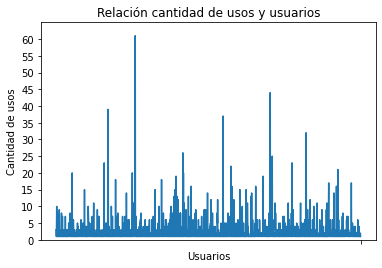

In [10]:
#Estudio y valoración de cantidad de usos de los OINKS

plt.plot(can_use.index,can_use);
plt.gca().set_ylim(0,65)
ticks_y = np.arange(0, 65, 5)
plt.gca().set_yticks(ticks_y)
plt.gca().set_xticks('')
plt.xlabel('Usuarios')
plt.ylabel('Cantidad de usos')
plt.title('Relación cantidad de usos y usuarios')
plt.show()

In [11]:
can_use.mean()

2.623792270531401

In [12]:
can_use.mode()

0    1
Name: operation_date, dtype: int64

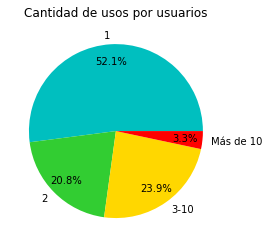

In [13]:
c0=len(can_use[can_use == 1])
c1=len(can_use[can_use == 2])
c2=len(can_use[(can_use > 2) & (can_use < 11)])
c4=len(can_use[can_use > 10])
v = (c0,c1,c2,c4)
labels = ('1','2','3-10','Más de 10')
plt.pie(v, labels = labels, colors=['c', 'limegreen', 'gold', 'r'], autopct='%1.1f%%', 
        pctdistance=0.8)
plt.title('Cantidad de usos por usuarios');

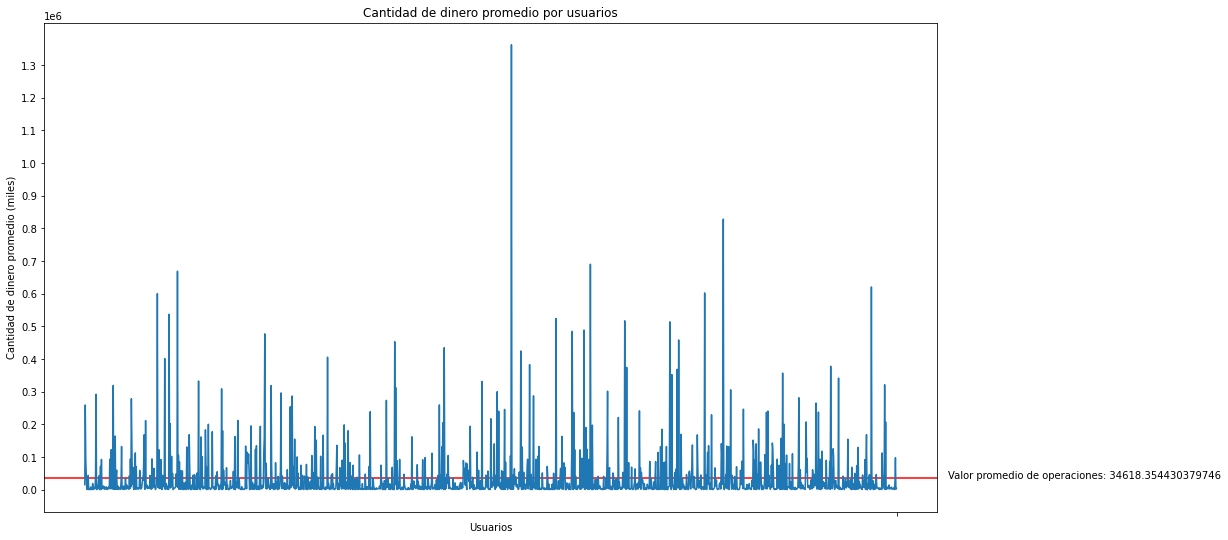

In [14]:
#Estudio y valoración de los montos de dinero de los usuarios

ax = plt.figure(figsize =(16, 9))
plt.plot(op_pro.index, op_pro)
ticks_y = np.arange(0, 1400000, 100000)
plt.gca().set_yticks(ticks_y)
plt.gca().set_xticks('')
plt.gca().text(1760,mean_operations-1000,'Valor promedio de operaciones: '+ str(mean_operations))
plt.axhline(y=mean_operations, zorder=0, c='r')
plt.xlabel('Usuarios')
plt.ylabel('Cantidad de dinero promedio (miles)')
plt.title('Cantidad de dinero promedio por usuarios')
plt.show();

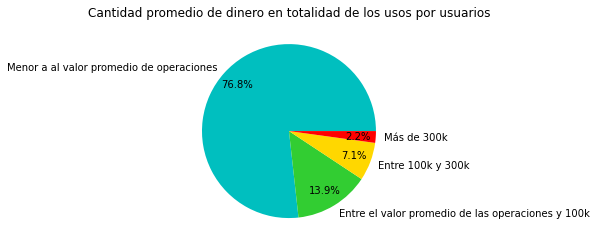

In [15]:
c0=len(op_pro[op_pro <= mean_operations])
c1=len(op_pro[(op_pro > mean_operations) & (op_pro < 100001)])
c2=len(op_pro[(op_pro > 100000) & (op_pro < 300001)])
c3=len(op_pro[op_pro > 300000])
v = (c0,c1,c2,c3)
labels = ('Menor a al valor promedio de operaciones','Entre el valor promedio de las operaciones y 100k',
          'Entre 100k y 300k', 'Más de 300k')
plt.pie(v, labels = labels, colors=['c', 'limegreen', 'gold','r'], autopct='%1.1f%%', 
        pctdistance=0.8)
plt.title('Cantidad promedio de dinero en totalidad de los usos por usuarios');

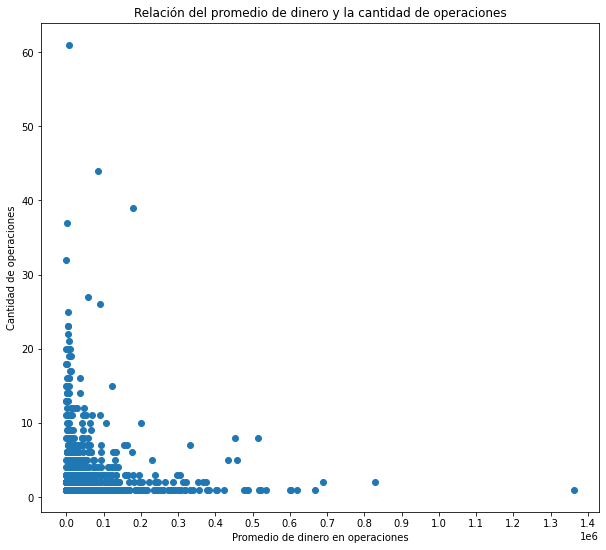

In [16]:
#Relación de cantidad de operaciones y cantidad de dinero

ax = plt.figure(figsize =(10, 9))
plt.scatter(op_pro,can_use)
ticks_x = np.arange(0, 1400020, 100000)
plt.gca().set_xticks(ticks_x)
plt.xlabel('Promedio de dinero en operaciones')
plt.ylabel('Cantidad de operaciones')
plt.title('Relación del promedio de dinero y la cantidad de operaciones')
plt.show();

Se establecen las siguientes escalas:

Escala de puntajes parcial para los usuarios relacionada con la cantidad de usos de los dispositivos. El puntaje se construye teniendo en cuenta que la moda de usos es 1, y el promedio de usos es aproximadamente 2.6

El puntaje se distrubuye así:

1 uso = 1 punto 

2 usos = 2 puntos

3 - 10 usos = 3 puntos

Más de 10 usos = 4 puntos



Una escala de puntajes parcial para los usuarios relacionada con la cantidad promedio de dinero en los usos que hace los dispositivos. El puntaje se construye teniendo en cuenta que el valor promedio de todas las operaciones.

El puntaje se distrubuye así:

Menor al promedio de operaciones = 0 punto

Entre el promedio de operaciones y 100k = 1 punto

Entre 100k y 300k = 2 puntos

Mayor a 300k = 3 puntos


Adicionalmente a aquellos usuarios que se encuentren en el cuarto cuadrante de la figura que relaciona el promedio de dinero y la cantidad de operaciones, es decir que tienen una cantidad de operaciones menor a 30 y un promedio de dinero mayor a 700k, se los otrorga un punto extra.

In [17]:
#Estudio y valoración de la antiguedad de la usuarios en relación a su cantidad de uso de los dispositivos y a la
#cantidad de dinero promedio.
#La antiguedad de hace en relación a la fecha de la última operación registrada en la base de datos. Es decir el 24/02/2022


antiguedad = fecha_act - ing_fecha
antiguedad = antiguedad.apply(lambda x : int(x.days))
antiguedad

user_id
001762e3-094d-415c-9304-c7c182e0c16a    108
002a5f4d-a93d-4cc5-b089-e16169bc16a2     92
006687d3-8ff3-461e-bdac-cb8e8e4c5a26    331
0072157e-a634-4cb3-bead-b1a2981485ca     42
0082af19-8bf7-46f7-8a21-c34e46ac5e2a     73
                                       ... 
ff2e941c-8808-4219-bdd9-33202e11c0b0      8
ff5aacc8-320e-4cc3-82a8-059316b857c4    346
ffaace49-8a5c-4030-a791-8815b5314283    393
ffe7b3ac-7c57-487d-91bc-de505fdfdcab     14
fffd063d-3fb4-4356-983d-24d1305996a9    270
Name: user_createddate, Length: 1656, dtype: int64

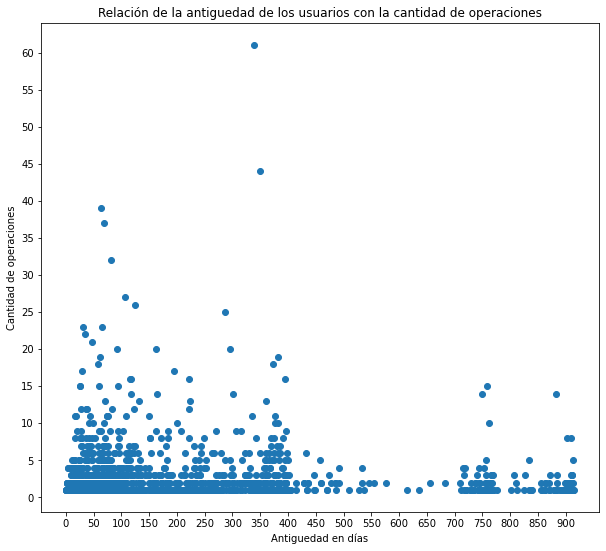

In [20]:
ax = plt.figure(figsize =(10, 9))
plt.scatter(antiguedad,can_use)
ticks_y = np.arange(0, 65,5)
plt.gca().set_yticks(ticks_y)
ticks_x = np.arange(0, 902,50)
plt.gca().set_xticks(ticks_x)
plt.xlabel('Antiguedad en días')
plt.ylabel('Cantidad de operaciones')
plt.title('Relación de la antiguedad de los usuarios con la cantidad de operaciones')
plt.show();

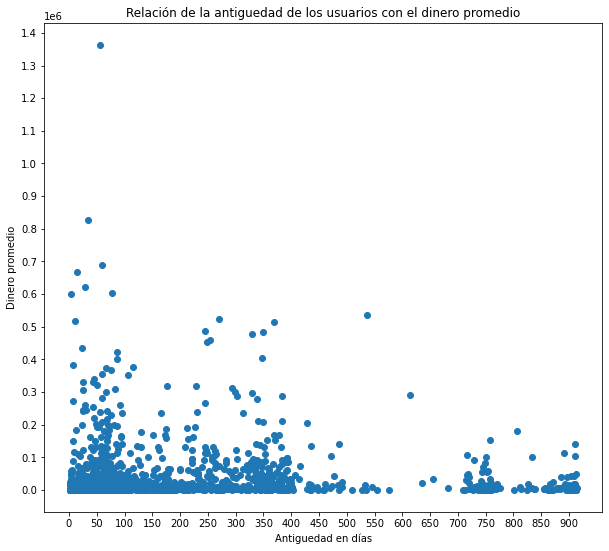

In [19]:
ax = plt.figure(figsize =(10, 9))
plt.scatter(antiguedad,op_pro)
ticks_y = np.arange(0, 1400020, 100000)
plt.gca().set_yticks(ticks_y)
ticks_x = np.arange(0, 902,50)
plt.gca().set_xticks(ticks_x)
plt.xlabel('Antiguedad en días')
plt.ylabel('Dinero promedio')
plt.title('Relación de la antiguedad de los usuarios con el dinero promedio')
plt.show();

Analizando la distribución de las gráficas de antiguedad con la cantidad de operaciones y el dinero promedio de operaciones se ve que no existen usuarios de gran antiguedad que tengan gran cantidad de operaciones o grandes promedios de dinero. Por el contrario, se encuentras usuarios con poca antiguedad y grandes cantidades de operaciones y promedios de dinero altos. 
En la métrica entonces se agrega un punto a la valoración a aquellos usuarios con una antiguedad menor a 450 días y promedio de dinero en operaciones por encima de 700k, y otro punto a aquellos usuarios con antiguedad menos a 450 días y una cantidad de operaciones superior a 30.

In [21]:
#Definición y aplicación de la métrica

def puntaje(x):
    
    p=0
    
    #puntaje de cantidad de operaciones
    if x['Cantidad de operaciones'] == 1:
        p = p + 1
    elif x['Cantidad de operaciones'] == 2:
        p = p + 2
    elif (x['Cantidad de operaciones'] > 2) and (x['Cantidad de operaciones'] < 11):
        p = p + 3
    else:
        p = p + 4
    
    #puntaje promedio de dinero en operaciones
    
    if x['Dinero promedio de operaciones'] < mean_operations:
        p = p 
    elif (x['Dinero promedio de operaciones'] >= mean_operations) and (x['Dinero promedio de operaciones'] < 100001):
        p = p + 1
    elif (x['Dinero promedio de operaciones'] > 100000) and (x['Dinero promedio de operaciones'] < 300001):
        p = p + 2
    else:
        p = p + 3
        
    #Puntos adicionales por relación cantidad operaciones/dinero promedio
    
    if (x['Cantidad de operaciones'] < 31) and (x['Dinero promedio de operaciones'] > 700000):
        p = p + 1
        
    #Puntos por relación antiguedad/cantidad de operaciones y antiguedad/dinero promedio
    
    if (x['Antiguedad en días'] < 451) and (x['Dinero promedio de operaciones'] > 700000):
        p = p + 1
    
    if (x['Antiguedad en días'] < 451) and (x['Cantidad de operaciones'] > 30):
        p = p + 1
        

    return p


val_usu = pd.merge(can_use, op_pro, left_index=True, right_index=True)

val_usu = pd.merge(val_usu, antiguedad, left_index=True, right_index=True)

val_usu.rename(columns={'operation_date' : 'Cantidad de operaciones', 'operation_value' : 'Dinero promedio de operaciones', 
                        'user_createddate' : 'Antiguedad en días'}, inplace=True)

val_usu['Puntaje'] = val_usu.apply(lambda x : puntaje(x), axis=1)

In [22]:
val_usu.head(10)

,Cantidad de operaciones,Dinero promedio de operaciones,Antiguedad en días,Puntaje
user_id,,,,
001762e3-094d-415c-9304-c7c182e0c16a,3,14916.666667,108,3
002a5f4d-a93d-4cc5-b089-e16169bc16a2,1,259000.000000,92,3
006687d3-8ff3-461e-bdac-cb8e8e4c5a26,4,93900.000000,331,4
0072157e-a634-4cb3-bead-b1a2981485ca,10,43345.000000,42,4
0082af19-8bf7-46f7-8a21-c34e46ac5e2a,1,1500.000000,73,1
00c042ce-0555-43ca-b38f-81c0a43cef9e,1,100.000000,82,1
00e20270-69ed-4bae-9c3e-40a24befc0e1,2,2600.000000,738,2
00ebe74b-3e22-4852-88cc-80b2c9fbd116,8,43306.250000,903,4
011d6ff3-5778-403e-bbd0-2f934826848b,1,50.000000,34,1


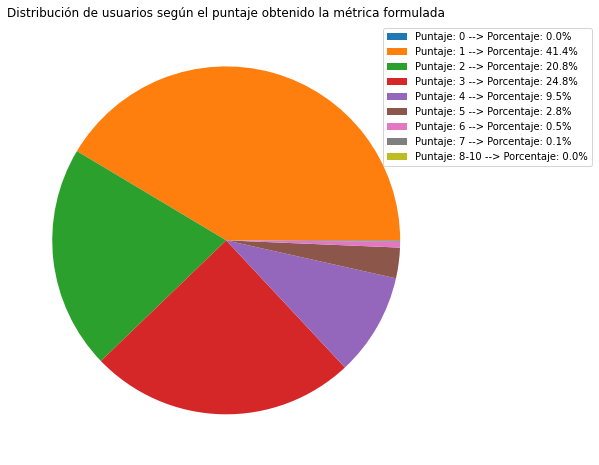

In [23]:
plt.figure(figsize=(8,8))

c0=len(val_usu[val_usu['Puntaje'] == 0])
c1=len(val_usu[val_usu['Puntaje'] == 1])
c2=len(val_usu[val_usu['Puntaje'] == 2])
c3=len(val_usu[val_usu['Puntaje'] == 3])
c4=len(val_usu[val_usu['Puntaje'] == 4])
c5=len(val_usu[val_usu['Puntaje'] == 5])
c6=len(val_usu[val_usu['Puntaje'] == 6])
c7=len(val_usu[val_usu['Puntaje'] == 7])
c8=len(val_usu[val_usu['Puntaje'] == 8])
v = (c0,c1,c2,c3,c4,c5,c6,c7,c8)
labels = ('0', '1', '2', '3', '4', '5', '6', '7', '8-10')
p=[]
for c in v:
    p.append((c*100) / len(val_usu))
plt.pie(v)
labels = [f'Puntaje: {l} --> Porcentaje: {s:0.1f}%' for l, s in zip(labels, p)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

plt.title('Distribución de usuarios según el puntaje obtenido la métrica formulada');

In [ ]:
#Si desea saber el puntaje de un usuario en particular use la siguiente línea:

id_user = '001762e3-094d-415c-9304-c7c182e0c16a'
inf = val_usu.loc[id_user]
pun = puntaje(val_usu.loc[id_user])
print ('La puntuación del usuario ' + id_user + ' es: ' + str(pun))